## Observations and Insights 

In [1]:
# Dependencies and Setup
%matplotlib notebook 

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
mouse_data_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_data_complete_df ["Mouse ID"].value_counts() 

g989    13
c402    10
g296    10
p136    10
l471    10
        ..
b447     1
o848     1
l872     1
d133     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = mouse_data_complete_df.loc[mouse_data_complete_df.duplicated(), :]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print (duplicates)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_complete_df.drop_duplicates(keep=False, inplace=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_data_complete_df ["Mouse ID"].value_counts()

g989    11
c402    10
g296    10
p136    10
l471    10
        ..
b447     1
o848     1
l872     1
d133     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
mouse_data_complete_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

## Bar and Pie Charts

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Filter the DataFrame down only to those columns to chart
drug_and_timepoints = mouse_data_complete_df[["Drug Regimen","Timepoint"]]

# Set the index to be "Drug Regimen" so they will be used as labels
drug_and_timepoints = drug_and_timepoints.set_index("Drug Regimen")

drug_and_timepoints.head()

,Timepoint
Drug Regimen,
Ramicane,0
Ramicane,5
Ramicane,10
Ramicane,15
Ramicane,20


<IPython.core.display.Javascript object>


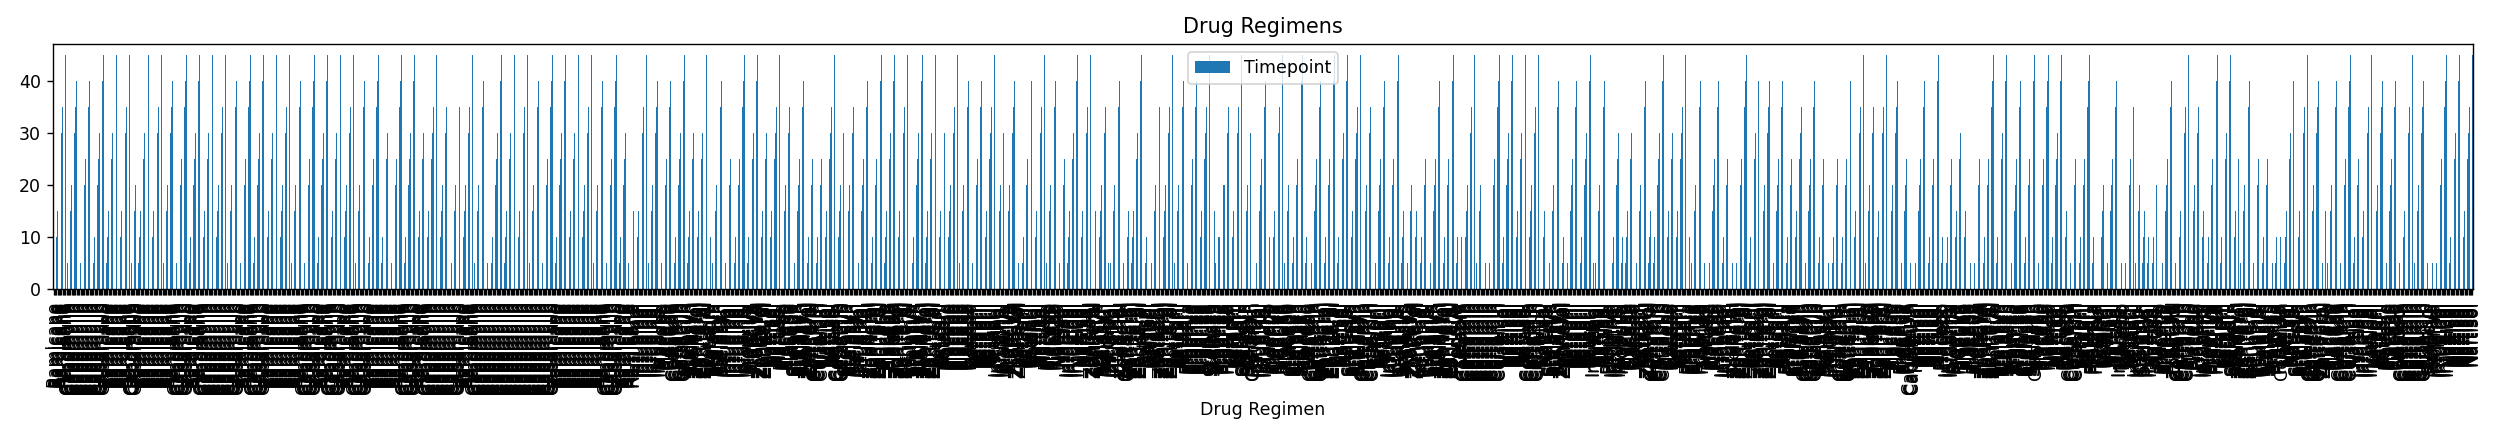

In [9]:
# Use DataFrame.plot() in order to create a bar chart of the data
drug_and_timepoints.plot(kind="bar", figsize=(20,3.5))

# Set a title for the chart
plt.title("Drug Regimens")

plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


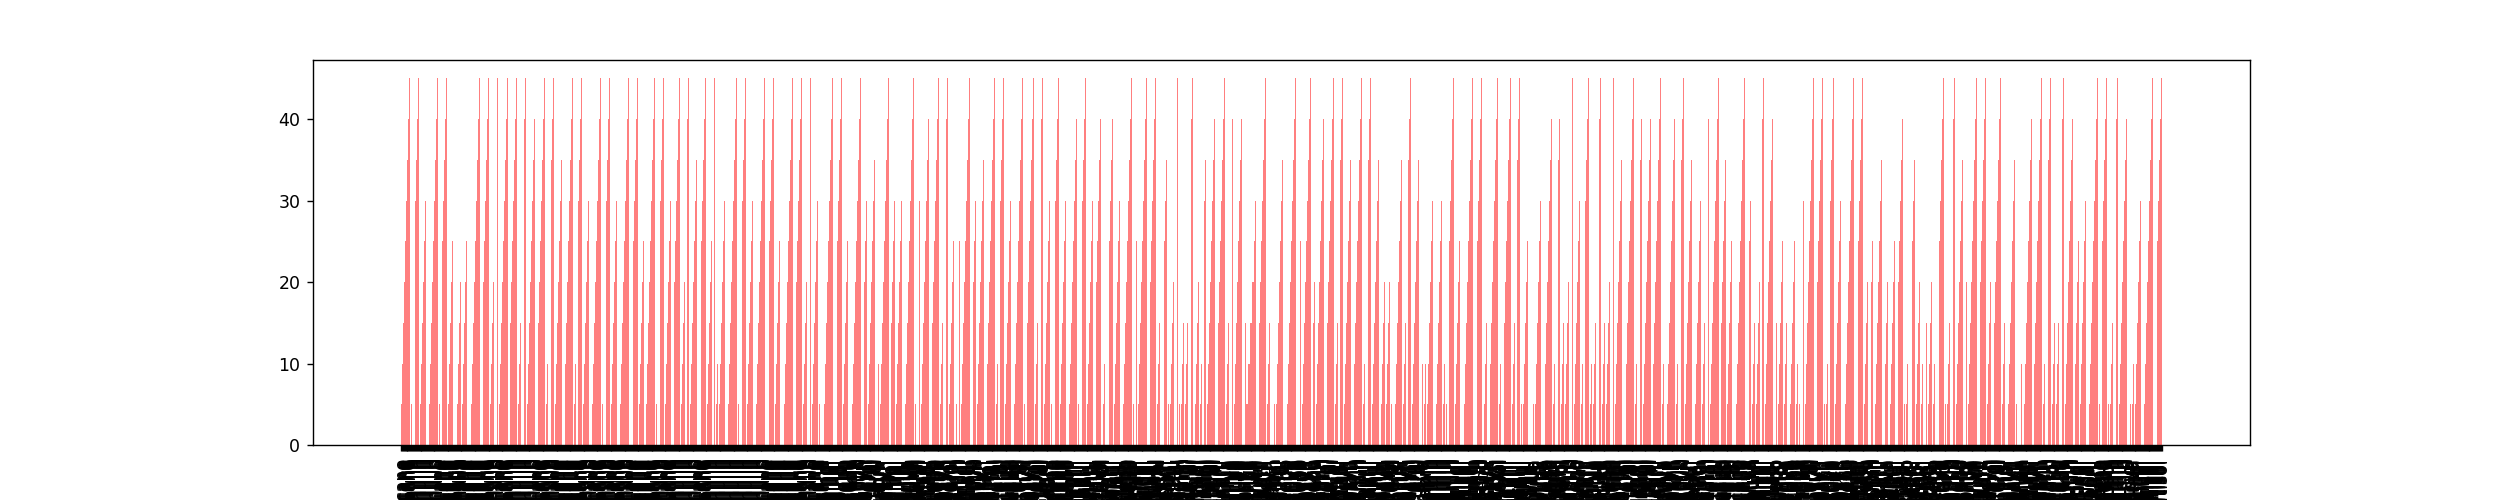

([<matplotlib.axis.XTick at 0x1a38e43eba8>,
  ...],
 [Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Capomulin'),
  Text(0, 0, 

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = np.arange(len(mouse_data_complete_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,4))
plt.bar(x_axis, mouse_data_complete_df["Timepoint"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, mouse_data_complete_df["Drug Regimen"], rotation="vertical")

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# remove duplictes
individual_count = mouse_data_complete_df.drop_duplicates('Mouse ID')

total_gender_count = individual_count['Sex'].count()
# of Gender count
gender_count = individual_count['Sex'].value_counts()
# gender_count

# percentage of male count
gender_percentage = (gender_count/total_gender_count)*100
#gender_percentage

# set table up
gender_demographics = pd.DataFrame(
    {"Total Count":gender_count,
    'Percentage of Mice':gender_percentage
    }
)
# change format to %
gender_demographics["Percentage of Mice"] = gender_demographics["Percentage of Mice"].astype(float).map("{:,.2f}%".format)
 
#print table
gender_demographics

,Total Count,Percentage of Mice
Male,125,50.20%
Female,124,49.80%


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen